# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background
Dalam capstone project kali ini kita akan melakukan scrapping dari website coingecko.com untuk mengetahui fluktuasi harga etherium. Bagian data yang akan kita ambil adalah data waktu dan volume. Selanjutnya kedua data tersebut akan dibuat visualisasi sebuah plot pergerakan volume perdagangan dari Ethereum.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method. Hal pertama yang perlu dilakukan adalah mengakses link url dengan method `get`.

In [1]:
import requests 

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30' #masukkan link url
url_get = requests.get(url, headers = { 'User-Agent': 'Popular browser\'s user-agent', }) 

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500] # dilakukan slicing pada source code html agar content url tidak terlalu panjang

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup)) #classnya menjadi berubah ke beautifulsoup

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])
#runtutan code pada 2 section ini dijalankan untuk mentransform code complex HTML menjadi tree pada python object

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


Bisa dilihat code html terakhir menjadi lebih mudah dibaca oleh manusia jika dibandingkan dengan source code html sebelumnya.

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. Dalam website etherium, kita harus mencari key code yang membungkus data tabel. Untuk mencari key codenya, kita harus membuka inspect element pada halaman website lalu cari code yang membungkus tabel tersebut.

In [5]:
table = soup.find('tbody') #function find digunakan untuk mencari informasi di beautifulsoup
print(table.prettify()[1:500])
#syntax tersebut digunakan untuk mendapatkan seluruh code yang membentuk tabel
#dislicing agar tidak terlalu penuh

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


In [6]:
#coba kita gunakan `find_all` untuk mengambil seluruh data tanggal
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [7]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text
#untuk menghilangkan codenya gunakan function `.text`

'2021-06-30'

Karena jumlah data etherium cukup banyak, maka untuk mempermudah kita akan gunakan metode looping. Namun sebelumnya, kita harus mencari terlebih dahulu berapa banyak total baris untuk jumlah looping yang dilakukan.
Finding row length.

In [8]:
Data = table.find_all('th', attrs={'class':'font-semibold text-center'})
len(Data)

60

In [9]:
#atau bisa juga dicari melalui 'tr', hasilnya sama saja
Dataa = table.find_all('tr')
len(Dataa)

60

In [10]:
row_length = len(Data)

Looping adalah pengulangan perintah beberapa kali. Dalam hal ini kita akan menscrapping data date dan volume dengan cara looping agar tidak perlu men-chaining berkali-kali. Syntax untuk looping biasanya dimulai dengan 'for i in range (__,__)' atau bisa jg menggunakan while. Dalam hal ini, syntax tersebut berarti, lakukan looping untuk i sebanyak range(). Ingat bahwa python memiliki index yang dimulai dari 0. sehingga perlu diperhatikan agar rentang looping tidak kurang.

In [11]:
temp = [] #sebagai wadah untuk menyimpan list hasil scraping dengan cara looping

for table in soup.find_all('tr')[1:]:

    #Scrapping Date 
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})
    dates = date[0].text

    #Scrapping Volume
    volum = table.find_all('td')
    volume = volum[1].text.strip()
    
    temp.append((dates,volume)) #gabungkan hasil scrapping date dan volume
    
temp


[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

## Creating data frame & Data wrangling

Setelah berhasil mendapatkan list data dari hasil scrapping web, data tersebut akan dimasukan ke dalam dataframe berbentuk tabel.

In [12]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','volume'))
df.head()

,date,volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"


In [13]:
df.dtypes #cek tipe data untuk persiapan proses data cleaning

date      object
volume    object
dtype: object

## Data Cleaning
Sebelum melakukan analisis data lebih dalam, sesuaikan terlebih dahulu tipe data yang tercantum pada dataframe. Dalam hal ini, date akan diubah ke type data Date time sedangkan volume akan diubak menjadi int.

In [14]:
df['volume'] = df['volume'].str.replace(",","") #hapus koma dari data volume
df['volume'] = df['volume'].str.replace("$","") #hapus '$' dari data volume
df['volume'] = df['volume'].astype('float64') #ubah tipe data volume dari object menjadi float
df['date'] = df['date'].astype('datetime64') #ubah tipe data date dari object menjadi datetime

df.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8008\3056373275.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace("$","") #hapus '$' dari data volume


date      datetime64[ns]
volume           float64
dtype: object

In [15]:
df = df.set_index('date')

In [16]:
df.head()

,volume
date,
2021-06-30,2.714914e+10
2021-06-29,3.062933e+10
2021-06-28,2.431641e+10
2021-06-27,2.424951e+10
2021-06-26,2.598138e+10


## Data Wrangling & Visualization

<AxesSubplot:xlabel='date'>

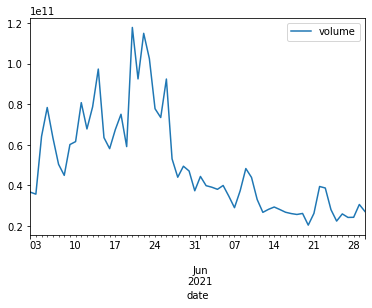

In [16]:
df.plot()

### Insight yang didapat: 
terlihat perubahan harga dari etherium sangat fluktuatif dan terjadi peak di sekitar pertengahan Juni

<AxesSubplot:>

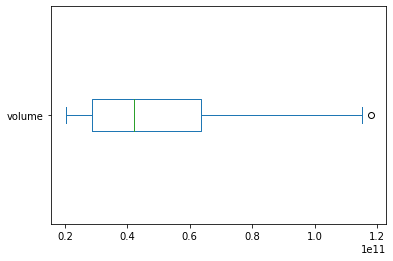

In [19]:
df.plot(kind='box', vert=False)

In [17]:
df = df.reset_index()
df['Month'] = df['date'].dt.to_period('M')
df['Day'] = df['date'].dt.day_name()
df

,date,volume,Month,Day
0,2021-06-30,2.714914e+10,2021-06,Wednesday
1,2021-06-29,3.062933e+10,2021-06,Tuesday
2,2021-06-28,2.431641e+10,2021-06,Monday
3,2021-06-27,2.424951e+10,2021-06,Sunday
4,2021-06-26,2.598138e+10,2021-06,Saturday
5,2021-06-25,2.244749e+10,2021-06,Friday
6,2021-06-24,2.809874e+10,2021-06,Thursday
7,2021-06-23,3.875502e+10,2021-06,Wednesday
8,2021-06-22,3.949996e+10,2021-06,Tuesday
9,2021-06-21,2.623585e+10,2021-06,Monday


In [30]:
month_volume = df.groupby('Month').mean()
month_volume

,volume
Month,
2021-05,6.824038e+10
2021-06,3.177804e+10


<AxesSubplot:xlabel='Month'>

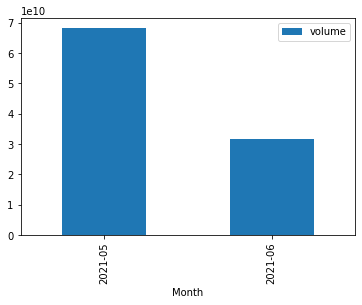

In [31]:
month_volume.plot.bar()

### Insight
Rata-rata harga etherium pada bulan Mei lebih besar dibanding bulan Juni

In [27]:
day_volume = df.groupby('Day').sum()
day_volume

,volume
Day,
Friday,4.037588e+11
Monday,3.891008e+11
Saturday,3.919972e+11
Sunday,4.123878e+11
Thursday,4.507160e+11
Tuesday,4.737057e+11
Wednesday,4.788866e+11


<AxesSubplot:xlabel='Day'>

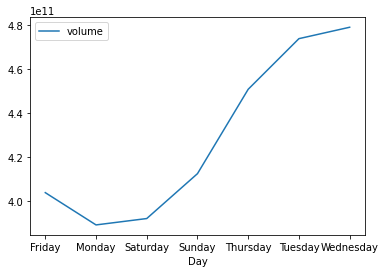

In [29]:
day_volume.plot()

### Insight:
Harga etherium tertinggi terjadi di hari Rabu sedangkan terendahnya di hari Senin.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Beberapa insight yang didapat dari hasil data wrangling dan visualisasi telah disebutkan pada insight masing-masing visualisasi data.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.